In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
image = cv2.imread("IMG_20220816_234756_154.jpg")
cv2.imshow("Youssef Abdel Mottaleb",image)
cv2.waitKey()
cv2.destroyAllWindows()

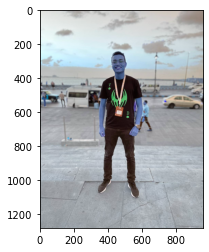

In [3]:
# opening the image from device
imgPlot = plt.imshow(image)
plt.show()

In [4]:
#videoCapture = cv2.VideoCapture("")

#fps = videoCapture.get(cv2.CAP_PROP_FPS)

#size = (int(videoCapture.get(cv2.CAP_PROP_FRAME_WIDTH)),
#       (int(videoCapture.get(cv2.CAP_PROP_FRAME_HEIGHT)),
#       ))
        
#videoWriter =cv2.VideoWriter(
#"",cv2.VideoWriter_fourcc("I","4","2","0"),fps , size)

#success , frame = videoCapture.read()

#while success: # Loop till no more frames
#    videoWriter.write(frame)
#    success , frame = videoCapture.read()

In [5]:
image = cv2.imread('IMG_20220816_234756_154.jpg', flags=cv2.IMREAD_COLOR)

In [11]:
# display the image to the screen
cv2.imshow('Youssef Abdel Mottaleb', image)
cv2.waitKey()
cv2.destroyAllWindows()

In [23]:
# sum of kernel must be equal to 1
kernel = np.array([[0, -1, 0],
                   [-1, 5,-1],
                   [0, -1, 0]])
kernel2 = np.array([[-1,-1,-1],
                   [-1,9,-1],
                   [-1,-1,-1]])
image_sharp = cv2.filter2D(src=image, ddepth=-1, kernel=kernel)
cv2.imshow('Youssef Abdel Mottaleb Sharpened', image_sharp)
cv2.waitKey()
cv2.destroyAllWindows()

In [14]:
def displayImage(image):
    # display the image to the screen
    cv2.imshow('Youssef Abdel Mottaleb', image)
    cv2.waitKey()
    cv2.destroyAllWindows()

Morphological transformations are some simple operations based on the image shape. It is normally performed on binary images. It needs two inputs, one is our original image, second one is called structuring element or kernel which decides the nature of operation. Two basic morphological operators are Erosion and Dilation. Then its variant forms like Opening, Closing, Gradient etc also comes into play. We will see them one-by-one with help of following image:

1. Erosion

    The basic idea of erosion is just like soil erosion only, it erodes away the boundaries of foreground object (Always try to keep foreground in white). So what it does? The kernel slides through the image (as in 2D convolution). A pixel in the original image (either 1 or 0) will be considered 1 only if all the pixels under the kernel is 1, otherwise it is eroded (made to zero).

    So what happends is that, all the pixels near boundary will be discarded depending upon the size of kernel. So the thickness or size of the foreground object decreases or simply white region decreases in the image. It is useful for removing small white noises (as we have seen in colorspace chapter), detach two connected objects etc.

Here, as an example, I would use a 5x5 kernel with full of ones. Let's see it how it works:

In [15]:
img = cv2.imread('IMG_20220816_234756_154.jpg',0)
kernel = np.ones((5,5),np.uint8)
erosion = cv2.erode(img,kernel,iterations = 1)

displayImage(erosion)

2. Dilation

    It is just opposite of erosion. Here, a pixel element is '1' if at least one pixel under the kernel is '1'. So it increases the white region in the image or size of foreground object increases. Normally, in cases like noise removal, erosion is followed by dilation. Because, erosion removes white noises, but it also shrinks our object. So we dilate it. Since noise is gone, they won't come back, but our object area increases. It is also useful in joining broken parts of an object.

In [10]:
dilation = cv2.dilate(img,kernel,iterations = 1)
displayImage(dilation)

3. Opening

    Opening is just another name of erosion followed by dilation. It is useful in removing noise, as we explained above. Here we use the function, cv.morphologyEx()

In [11]:
opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
displayImage(opening)

4. Closing

    Closing is reverse of Opening, Dilation followed by Erosion. It is useful in closing small holes inside the foreground objects, or small black points on the object.

In [12]:
closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)
displayImage(closing)

5. Morphological Gradient

    It is the difference between dilation and erosion of an image.

The result will look like the outline of the object.

In [13]:
gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel)
displayImage(gradient)

6. Top Hat

    It is the difference between input image and Opening of the image. Below example is done for a 9x9 kernel.

In [14]:
tophat = cv2.morphologyEx(img, cv2.MORPH_TOPHAT, kernel)
displayImage(tophat)

7. Black Hat

    It is the difference between the closing of the input image and input image.

In [15]:
blackhat = cv2.morphologyEx(img, cv2.MORPH_BLACKHAT, kernel)
displayImage(img)

Image registration is a digital image processing technique that helps us align different images of the same scene. For instance, one may click the picture of a book from various angles. Below are a few instances that show the diversity of camera angles.
Now, we may want to “align” a particular image to the same angle as a reference image. In the images above, one may consider the first image to be an “ideal” cover photo, while the second and third images do not serve well for book cover photo purposes. The image registration algorithm helps us align the second and third pictures to the same plane as the first one.

How does image registration work? 
Alignment can be looked at as a simple coordinate transform. The algorithm works as follows:  

- Convert both images to grayscale.
- Match features from the image to be aligned, to the reference image and store the coordinates of the corresponding key points.  Keypoints are simply the selected few points that are used to compute the transform (generally points that stand out), and descriptors are histograms of the image gradients to characterize the appearance of a keypoint. In this post, we use ORB (Oriented FAST and Rotated BRIEF) implementation in the OpenCV library, which provides us with both key points as well as their associated descriptors.
- Match the key points between the two images. In this post, we use BFMatcher, which is a brute force matcher. BFMatcher.match() retrieves the best match, while BFMatcher.knnMatch() retrieves top K matches, where K is specified by the user.
- Pick the top matches, and remove the noisy matches.
- Find the homomorphy transform.
- Apply this transform to the original unaligned image to get the output image.
- Applications of Image Registration – 
- Some of the useful applications of image registration include: 

- Stitching various scenes (which may or may not have the same camera alignment) together to form a continuous panoramic shot.
- Aligning camera images of documents to a standard alignment to create realistic scanned documents.
- Aligning medical images for better observation and analysis.
- Below is the code for image registration. We have aligned the second image with reference to the third image.  

In [17]:
# Read the images and convert them into grey values

img_align = cv2.imread("im1.jpg") 
img_temp = cv2.imread("im2.jpg")
img1 = cv2.cvtColor(img_align, cv2.COLOR_BGR2GRAY)
img2 = cv2.cvtColor(img_temp, cv2.COLOR_BGR2GRAY)
height, width = img2.shape

In [18]:
# Setting up some key points and descriptors that will be used for matching the pixels from the template file.

orb_detector = cv2.ORB_create(5000)
kp1, d1 = orb_detector.detectAndCompute(img1, None)
kp2, d2 = orb_detector.detectAndCompute(img2, None)
matcher = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck = True)
matches = matcher.match(d1, d2)

In [19]:
# Create a homography for the validation of the resultant image

# homography, mask = cv2.findHomography(kp1, kp2, cv2.RANSAC)

In [ ]:
''' Registering Image:

transformed_img = cv2.warpPerspective(img_align,
                    homography, (width, height))
matchedVis =cv2.drawMatches(img1, kp1, img2, kp2,
      matches, None)
matchedVis = imutils.resize(matchedVis, width=1000)
cv2_imshow(matchedVis)
cv2.waitKey(0)'''

### The End